In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy

#Fitting the spectrum
from scipy.optimize import curve_fit

#Packages for using tables in astropy
from astropy.table import QTable
from astropy.io import ascii

#Using csv tables
import pandas as pd

The goal of this notebook is to fit the radio emission of the supernova 1993J, data can be extracted from https://iopscience.iop.org/article/10.1086/523258/pdf and is also aviable in this Github. 

# Introduction.

First, we need to save all the spectrum data in python variables.

In [5]:
#Initialice the data ararys where the first value will be the wavelenght name
data=[]

data_1=[]
data_2=[]
data_3=[]
data_6=[]
data_20=[]

data= pd.read_csv("Data/Datos SuperNova - 1.2_cm.csv")
data_1.extend(('1.2_cm', data))

data= pd.read_csv("Data/Datos SuperNova - 2_cm.csv")
data_2.extend(('2_cm', data))

data= pd.read_csv("Data/Datos SuperNova - 3.6_cm.csv")
data_3.extend(('3.6_cm', data))

data= pd.read_csv("Data/Datos SuperNova - 6_cm.csv")
data_6.extend(('6_cm', data))

data= pd.read_csv("Data/Datos SuperNova - 20_cm.csv")
data_20.extend(('20_cm', data))

data= []
data.extend((data_1, data_2, data_3, data_6, data_20))

data[1][1]

,Days,Telescope,Flux,Error
0,7.72,Camb,1.100,0.110
1,8.83,Camb,3.800,0.380
2,9.88,Camb,5.000,0.500
3,10.68,Camb,5.800,0.580
4,10.81,Camb,6.400,0.640
...,...,...,...,...
201,2825.00,VLA A,6.700,0.100
202,3213.38,VLA D/A,4.490,0.479
203,3959.47,VLA B/C,2.492,0.215
204,4184.57,VLA A,2.470,0.323


Making a plot to visualice the data.

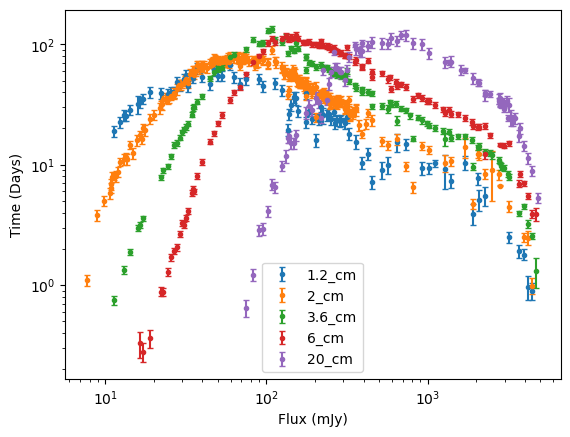

In [6]:
for wavelenght in data:
    plt.errorbar(wavelenght[1].Days, wavelenght[1].Flux, yerr=wavelenght[1].Error, fmt = '.', capsize=2, label= f'{wavelenght[0]}')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Flux (mJy)")
plt.ylabel("Time (Days)")
plt.legend()